In [1]:
%load_ext autoreload
%autoreload 2

In [253]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from final_project_code import FinalProject 
from newton_raphson import Newton_Raphson
from final_plot import plot_stuff
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [254]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from itertools import combinations
from matplotlib.patches import Patch
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [255]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [256]:
# from sklearn.metrics.pairwise import rbf_kernel
FP = FinalProject()

In [257]:
Rvss = pd.read_csv("./AG_Corp_Prod_DataBase.csv")

/tmp/ipykernel_1269/139095848.py:1: DtypeWarning: Columns (3,13) have mixed types. Specify dtype option on import or set low_memory=False.
  Rvss = pd.read_csv("./AG_Corp_Prod_DataBase.csv")


In [258]:
df = Rvss[['id', 'Form', 'FoundingYear',
       'Province', 'Region', 'Industry', 'OntheSide', 'Age', 'TaxedActivity',
       'YEAR', 'SubindustryCode', 'STCAP', 'Revenue',
       'TotalWorkers', 'TotalPower', 'GrandTotalWorkers', 'RevperWorker',
       'PowerperWorker', 'RevperGrandWorker', 'PowerperGrandWorker',
       'logRevperWorker', 'logPowerperWorker', 'logRevperGrandWorker',
       'logPowerperGrandWorker', 'logRev', 'logWorkers', 'logPower',
       'RegIndGroup', 'RegIndYearGroup', 'ProvIndGroup', 'ProvIndYearGroup',
       'IndYearGroup', 'IndustryFactor', 'ProvinceFactor', 'YearFactor',
       'AKTS', 'PAI', 'factory_id', 'FormNextYear', 'FormNextNextYear',
       'FactoryisCorpin1894', 'FormNextYearin1894', 'FactoryisCorpin1900',
       'FormNextYearin1900', 'FactoryisCorpin1908', 'NEWDEV', 'SHARES',
       'STPRICE', 'BONDS', 'Silk', 'Flax', 'Animal', 'Wool', 'Cotton',
       'MixedMaterials', 'Wood', 'Paper', 'MetalsandMachines', 'Foods',
       'Chemical', 'Mineral']]

In [259]:
df = FP.create_balanced_data(df)
# df = df.sample(n=10000, replace=False)

df incorporated have 2393 many rows
after balancing, df not incorporated have 2393 many rows


In [260]:
FP = FinalProject()
train, validate, test = FP.split_data(df)

In [261]:
cols=['TotalWorkers','TotalPower']
# RegionCoded is not generated here
cols = ["RegionCoded", "FactoryisCorpin1900", "NEWDEV"]
cols = cols[1:]

In [262]:
df_train, X_train, y_train = FP.prepare_data(train)
df_validate, X_validate, y_validate= FP.prepare_data(validate)
df_test, X_test, y_test = FP.prepare_data(test)

In [263]:
cols = ['PowerperWorker', 'RevperGrandWorker']
cols = ['logWorkers', 'logPower'] 
X_train = X_train.fillna(0)
print(X_train[cols].shape)
beta_old = np.ones((X_train[cols].shape[1],1))
print(beta_old.shape)
X_train = X_train[cols]
X_train = X_train.to_numpy()

y_train = y_train.to_numpy()
y_train = y_train.reshape(-1,1)
print(y_train.shape)

(2871, 2)
(2, 1)
(2871, 1)


In [265]:
from newton_raphson import Newton_Raphson
NR = Newton_Raphson() 
NR.regress(y = y_train, X = X_train, max_iters = 1e2, tol=1e-8, converged=False)

0.5
number of iteration: 1
beta: [[-0.00110934]
 [ 0.05687293]]
number of iteration: 2
beta: [[0.0242654 ]
 [0.08536007]]
number of iteration: 3
beta: [[0.03699968]
 [0.10271018]]
number of iteration: 4
beta: [[0.04341165]
 [0.11277716]]
number of iteration: 5
beta: [[0.04663252]
 [0.11828676]]
number of iteration: 6
beta: [[0.04824706]
 [0.12118289]]
number of iteration: 7
beta: [[0.0490554 ]
 [0.12266966]]
number of iteration: 8
beta: [[0.04945984]
 [0.12342319]]
number of iteration: 9
beta: [[0.04966214]
 [0.12380256]]
number of iteration: 10
beta: [[0.0497633 ]
 [0.12399289]]
number of iteration: 11
beta: [[0.04981388]
 [0.12408823]]
number of iteration: 12
beta: [[0.04983918]
 [0.12413594]]
number of iteration: 13
beta: [[0.04985182]
 [0.1241598 ]]
number of iteration: 14
beta: [[0.04985815]
 [0.12417174]]
number of iteration: 15
beta: [[0.04986131]
 [0.12417771]]
number of iteration: 16
beta: [[0.04986289]
 [0.12418069]]
number of iteration: 17
beta: [[0.04986368]
 [0.12418218]]


/home/xianzhiwang/miniforge3/envs/ml-0451/lib/python3.9/site-packages/mlxtend/plotting/decision_regions.py:315: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


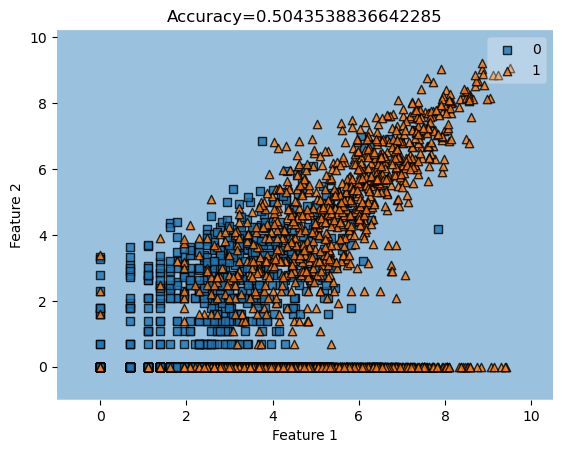

In [266]:
y_train = y_train.reshape(-1)
# NR.beta = np.array([1.01422606, 0.07874342])
# NR.beta = NR.beta.reshape(-1,1)
# print(NR.beta)
plot_decision_regions(X_train, y_train, clf=NR
                    #   filler_feature_values={2:value},
                    #   filler_feature_ranges={2:width}
                      )

mypredict = NR.predict(X_train)
title = plt.gca().set(title=f"Accuracy={(mypredict==y_train).mean()}",
                      xlabel="Feature 1",
                      ylabel="Feature 2")

ValueError: Dot product shape mismatch, (251001, 3) vs (2, 1)

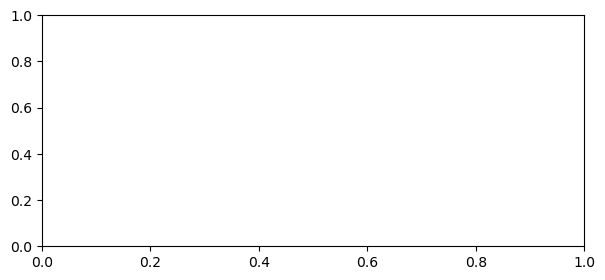

In [268]:
# from final_project_code import Newton_Raphson 
from final_plot import plot_stuff
PS = plot_stuff()
# NR = Newton_Raphson()
df_train, X_train, y_train = FP.prepare_data(train)
cols = ['logWorkers', 'logPower', 'Cotton']
X_train = X_train[cols].fillna(0)
y_train = y_train.fillna(0)
PS.plot_regions(NR, X_train,y_train)

In [270]:
# from final_plot import plot_stuff
# PS = plot_stuff()
# y_hat = NR.predict(X_train)
# PS.draw(X_train, y_train, y_hat)
cols = ['logWorkers', 'logPower'] 

In [271]:
LR = LogisticRegression(solver="newton-cg")
LR.fit(X_train, y_train)
LR.coef_

array([[0.99499051, 0.12564578, 0.58972099]])

In [272]:
X_test = X_test[cols].fillna(0)
X_test = X_test.to_numpy()
y_test = y_test.fillna(0)
y_test = y_test.to_numpy()
LR.score(X_test, y_test)

/home/xianzhiwang/miniforge3/envs/ml-0451/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.8048016701461378

ValueError: Filler values must be provided when X has more than 2 training features.

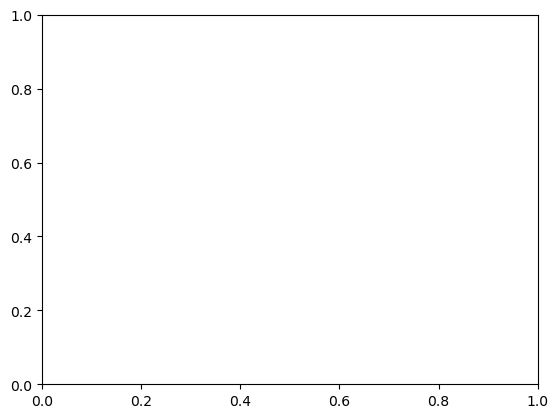

In [273]:
NR.simple_plot(LR, X_test, y_test)

In [21]:
mySVC = SVC(kernel="sigmoid", gamma="auto", shrinking=False)
mySVC.fit(X_train, y_train)

SVC(gamma='auto', kernel='sigmoid', shrinking=False)

SVC


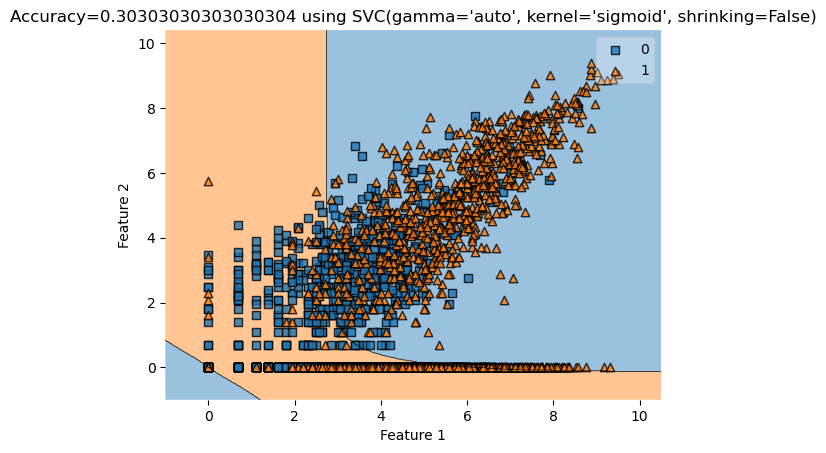

In [22]:
from final_project_code import Newton_Raphson 
NR2 = Newton_Raphson()
NR2.simple_plot(model = mySVC, X = X_train, y = y_train)
print("SVC")

In [23]:
DTree = DecisionTreeClassifier(random_state=0)
DTree.fit(X_train, y_train)
DTree.score(X_train, y_train)

0.9205851619644723

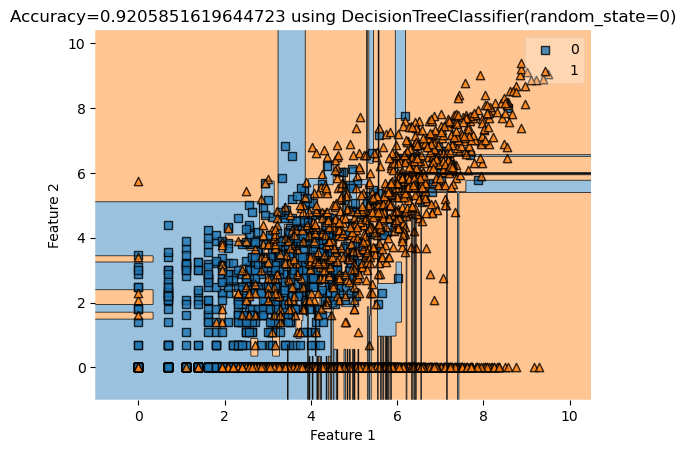

In [24]:
NR2.simple_plot(DTree, X_train, y_train)

In [25]:
RandomForest = RandomForestClassifier()
RandomForest.fit(X_train, y_train)
RandomForest.score(X_train, y_train)

0.9205851619644723

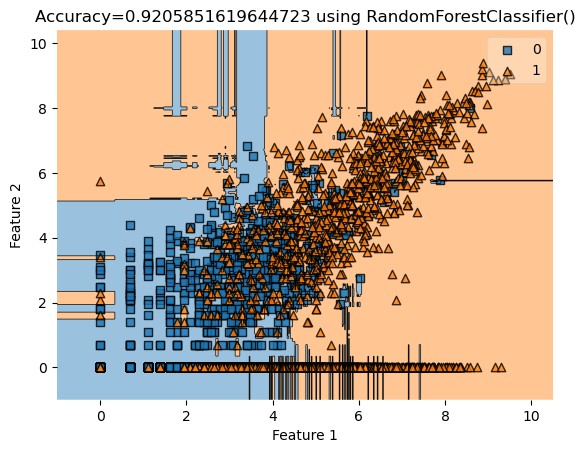

In [26]:
NR2.simple_plot(RandomForest, X_train, y_train)

In [27]:
SVC2 = SVC(kernel="linear", gamma = "auto", shrinking=False)

In [28]:
SVC2.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear', shrinking=False)

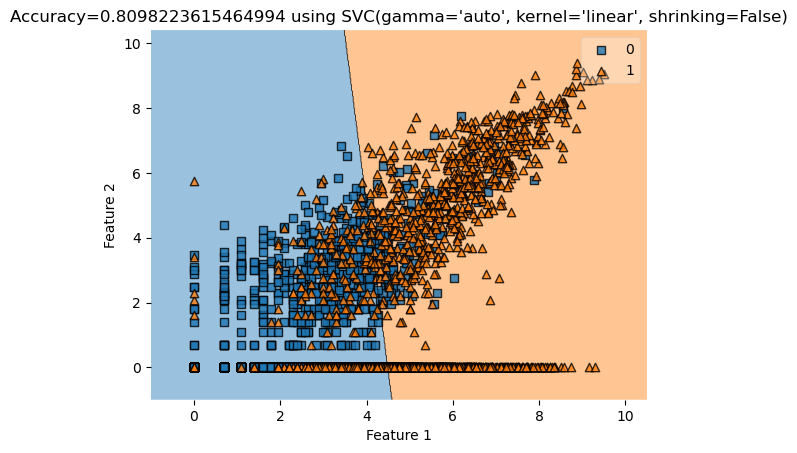

In [29]:
NR2.simple_plot(SVC2, X_train, y_train)

In [30]:
X_train.shape

(2871, 2)